In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("height.csv")
df.sample(5)

,gender,height
6876,Female,63.017257
631,Male,67.741589
4599,Male,68.764360
7107,Female,59.906528
1276,Male,70.343999


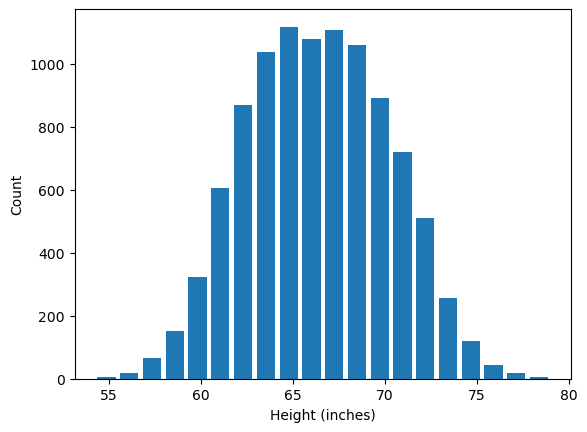

In [3]:
plt.hist(df.height, bins=20, rwidth=0.8)
plt.xlabel('Height (inches)')
plt.ylabel('Count')
plt.show()

In [4]:
df.height.min()

54.26313333

In [5]:
df.height.describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: height, dtype: float64

In [6]:
df.height.max()

78.99874235

In [9]:
df.height.mean()

66.3675597548656

In [10]:
df.height.std()

3.847528120795573

# 1.Handling Outliers

## 3 Standard Deviation

In [11]:
upper_limit = df.height.mean() + 3*df.height.std()
upper_limit

77.91014411725232

In [12]:
lower_limit = df.height.mean() -3*df.height.std()
lower_limit

54.824975392478876

In [13]:
df[(df.height>upper_limit) | (df.height<lower_limit)]

,gender,height
994,Male,78.095867
1317,Male,78.462053
2014,Male,78.998742
3285,Male,78.528210
3757,Male,78.621374
6624,Female,54.616858
9285,Female,54.263133


In [14]:
df_no_outlier_std_dev = df[(df.height<upper_limit) & (df.height>lower_limit)]
df_no_outlier_std_dev.head()

,gender,height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796


In [15]:
df_no_outlier_std_dev.shape

(9993, 2)

# 2.Imputation

In [18]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/horse-colic.csv"
data = pd.read_csv(url,header=None, na_values='?')

In [19]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,2.0,1,530101,38.5,66.0,28.0,3.0,3.0,NaN,2.0,...,45.0,8.4,NaN,NaN,2.0,2,11300,0,0,2
1,1.0,1,534817,39.2,88.0,20.0,NaN,NaN,4.0,1.0,...,50.0,85.0,2.0,2.0,3.0,2,2208,0,0,2
2,2.0,1,530334,38.3,40.0,24.0,1.0,1.0,3.0,1.0,...,33.0,6.7,NaN,NaN,1.0,2,0,0,0,1
3,1.0,9,5290409,39.1,164.0,84.0,4.0,1.0,6.0,2.0,...,48.0,7.2,3.0,5.3,2.0,1,2208,0,0,1
4,2.0,1,530255,37.3,104.0,35.0,NaN,NaN,6.0,2.0,...,74.0,7.4,NaN,NaN,2.0,2,4300,0,0,2


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 28 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       299 non-null    float64
 1   1       300 non-null    int64  
 2   2       300 non-null    int64  
 3   3       240 non-null    float64
 4   4       276 non-null    float64
 5   5       242 non-null    float64
 6   6       244 non-null    float64
 7   7       231 non-null    float64
 8   8       253 non-null    float64
 9   9       268 non-null    float64
 10  10      245 non-null    float64
 11  11      256 non-null    float64
 12  12      244 non-null    float64
 13  13      196 non-null    float64
 14  14      194 non-null    float64
 15  15      53 non-null     float64
 16  16      198 non-null    float64
 17  17      182 non-null    float64
 18  18      271 non-null    float64
 19  19      267 non-null    float64
 20  20      135 non-null    float64
 21  21      102 non-null    float64
 22  22

In [21]:
data.isna().sum()

0       1
1       0
2       0
3      60
4      24
5      58
6      56
7      69
8      47
9      32
10     55
11     44
12     56
13    104
14    106
15    247
16    102
17    118
18     29
19     33
20    165
21    198
22      1
23      0
24      0
25      0
26      0
27      0
dtype: int64

### Simple Imputer

In [22]:
from sklearn.impute import SimpleImputer

In [24]:
imputer = SimpleImputer(strategy='mean')

In [25]:
data.iloc[:,:] = imputer.fit_transform(data.iloc[:,:])

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 28 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       300 non-null    float64
 1   1       300 non-null    float64
 2   2       300 non-null    float64
 3   3       300 non-null    float64
 4   4       300 non-null    float64
 5   5       300 non-null    float64
 6   6       300 non-null    float64
 7   7       300 non-null    float64
 8   8       300 non-null    float64
 9   9       300 non-null    float64
 10  10      300 non-null    float64
 11  11      300 non-null    float64
 12  12      300 non-null    float64
 13  13      300 non-null    float64
 14  14      300 non-null    float64
 15  15      300 non-null    float64
 16  16      300 non-null    float64
 17  17      300 non-null    float64
 18  18      300 non-null    float64
 19  19      300 non-null    float64
 20  20      300 non-null    float64
 21  21      300 non-null    float64
 22  22

### Fillna

In [28]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/horse-colic.csv"
data = pd.read_csv(url,header=None, na_values='?')

In [29]:
data.fillna(data.median(),inplace=True)

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 28 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       300 non-null    float64
 1   1       300 non-null    int64  
 2   2       300 non-null    int64  
 3   3       300 non-null    float64
 4   4       300 non-null    float64
 5   5       300 non-null    float64
 6   6       300 non-null    float64
 7   7       300 non-null    float64
 8   8       300 non-null    float64
 9   9       300 non-null    float64
 10  10      300 non-null    float64
 11  11      300 non-null    float64
 12  12      300 non-null    float64
 13  13      300 non-null    float64
 14  14      300 non-null    float64
 15  15      300 non-null    float64
 16  16      300 non-null    float64
 17  17      300 non-null    float64
 18  18      300 non-null    float64
 19  19      300 non-null    float64
 20  20      300 non-null    float64
 21  21      300 non-null    float64
 22  22

# 3. Binning

In [31]:
data = pd.read_csv("housing.csv")

In [32]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [34]:
bins = np.linspace(data.median_house_value.min(),data.median_house_value.max(),4)

In [35]:
bins

array([ 14999.        , 176666.33333333, 338333.66666667, 500001.        ])

In [36]:
data['bins'] = pd.cut(data.median_house_value,bins,labels=['low','medium','high'],include_lowest=True)

In [37]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,bins
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,high
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,high
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,high
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,high
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,high
...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,low
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,low
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,low
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,low


<AxesSubplot:>

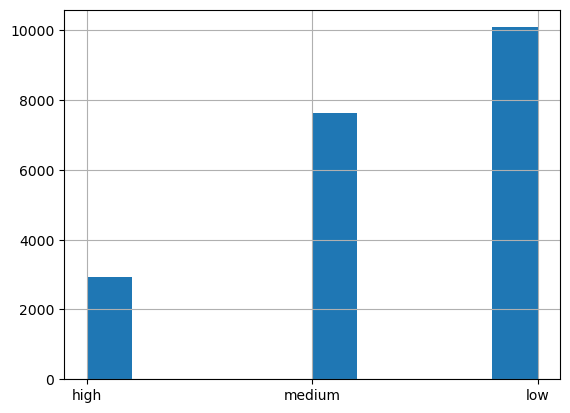

In [38]:
data.bins.hist()

<AxesSubplot:>

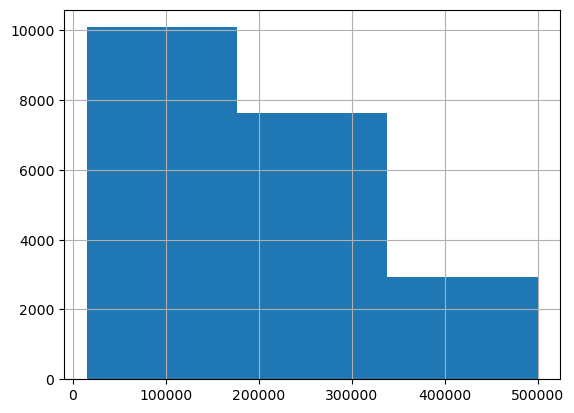

In [39]:
data.median_house_value.hist(bins=bins)

# 4. Log Transform

In [40]:
data = pd.read_csv("housing.csv")

In [41]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


<function matplotlib.pyplot.show(close=None, block=None)>

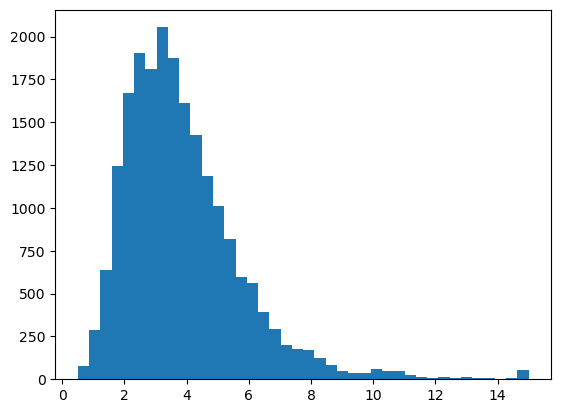

In [42]:
plt.hist(data['median_income'],bins=40)
plt.show

In [43]:
data['log_median_income'] = np.log((data.median_income))

In [44]:
data['log_median_income'].head()

0    2.119287
1    2.116424
2    1.982022
3    1.730434
4    1.347086
Name: log_median_income, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

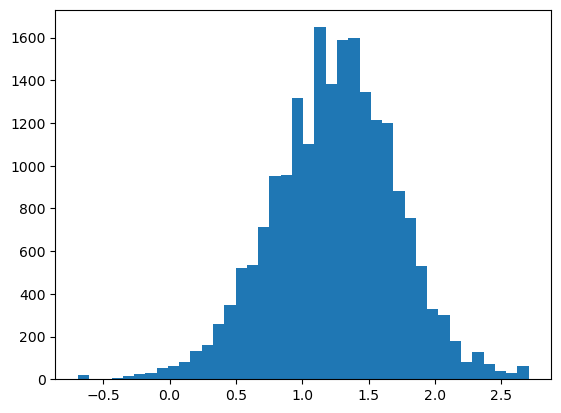

In [46]:
plt.hist(data.log_median_income,bins=40)
plt.show

### Handling negative data

In [47]:
data['log_longitude'] = -np.log((-data.longitude+1))

In [48]:
data.log_longitude

0       -4.814053
1       -4.813971
2       -4.814134
3       -4.814215
4       -4.814215
           ...   
20635   -4.804758
20636   -4.805741
20637   -4.805823
20638   -4.806641
20639   -4.805986
Name: log_longitude, Length: 20640, dtype: float64

# 5. One Hot Encoding

In [49]:
data = pd.read_csv("housing.csv")

In [50]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [51]:
data.ocean_proximity

0        NEAR BAY
1        NEAR BAY
2        NEAR BAY
3        NEAR BAY
4        NEAR BAY
           ...   
20635      INLAND
20636      INLAND
20637      INLAND
20638      INLAND
20639      INLAND
Name: ocean_proximity, Length: 20640, dtype: object

In [52]:
data.ocean_proximity.unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [53]:
encoded = pd.get_dummies(data.ocean_proximity)

In [54]:
data = data.join(encoded)

In [55]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,0,1,0,0,0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,0,1,0,0,0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,0,1,0,0,0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,0,1,0,0,0


In [56]:
data.drop('ocean_proximity',axis=1,inplace=True)

In [57]:
data.iloc[:,9:15]

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0
...,...,...,...,...,...
20635,0,1,0,0,0
20636,0,1,0,0,0
20637,0,1,0,0,0
20638,0,1,0,0,0


# 6. Feature Splitting

In [58]:
data = pd.read_csv("all_seasons.csv")

In [59]:
data.head()

,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,0,Dennis Rodman,CHI,36.0,198.12,99.790240,Southeastern Oklahoma State,USA,1986,2,...,5.7,16.1,3.1,16.1,0.186,0.323,0.100,0.479,0.113,1996-97
1,1,Dwayne Schintzius,LAC,28.0,215.90,117.933920,Florida,USA,1990,1,...,2.3,1.5,0.3,12.3,0.078,0.151,0.175,0.430,0.048,1996-97
2,2,Earl Cureton,TOR,39.0,205.74,95.254320,Detroit Mercy,USA,1979,3,...,0.8,1.0,0.4,-2.1,0.105,0.102,0.103,0.376,0.148,1996-97
3,3,Ed O'Bannon,DAL,24.0,203.20,100.697424,UCLA,USA,1995,1,...,3.7,2.3,0.6,-8.7,0.060,0.149,0.167,0.399,0.077,1996-97
4,4,Ed Pinckney,MIA,34.0,205.74,108.862080,Villanova,USA,1985,1,...,2.4,2.4,0.2,-11.2,0.109,0.179,0.127,0.611,0.040,1996-97


In [75]:
data['first_name'] = data.player_name.str.split(' ').map(lambda x:x[0])

In [76]:
data['first_name']

0          Dennis
1          Dwayne
2            Earl
3              Ed
4              Ed
           ...   
12300    Markieff
12301    Markelle
12302      Marcus
12303      Marcus
12304       Micah
Name: first_name, Length: 12305, dtype: object

In [77]:
data['last_name'] = data.player_name.str.split(' ').map(lambda x : x[-1])

In [78]:
data['last_name'].head()

0        Rodman
1    Schintzius
2       Cureton
3      O'Bannon
4      Pinckney
Name: last_name, dtype: object